<a href="https://colab.research.google.com/github/n23950629/My-python-work/blob/master/transfer_learning_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 初始動作，載入套件

In [0]:
%tensorflow_version 2.x

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

### 載入資料集(cifar10)

In [0]:
(x_train, y_train0), (x_test, y_test0) = datasets.cifar10.load_data()

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### 處理

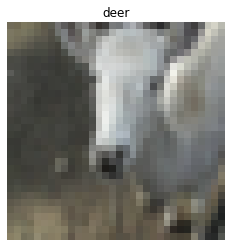

In [11]:
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off');

In [12]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train0.shape)
print("y_test:", y_test0.shape)

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


In [0]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

### 建(cifar10)神經網路

In [0]:
CF_CNN_layers_10 = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(128, (3, 3), padding='same', activation='relu'),
           MaxPool2D(),
           Conv2D(512, (3, 3), padding='same', activation='relu'),
           GlobalAveragePooling2D()]

In [0]:
FC_layers = [Dense(units=256, activation='relu'),
       Dense(units=10, activation='softmax')]

### 看模型長相

In [24]:
model = Sequential(CF_10_CNN_layers+FC_layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

### 設定評量好壞的指標

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['categorical_accuracy'])

### 訓練步驟

In [26]:
model.fit(x_train, y_train, batch_size=128, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 550s 1s/step - loss: 1.7635 - categorical_accuracy: 0.3304 - val_loss: 1.5918 - val_categorical_accuracy: 0.4120
Epoch 2/5
391/391 [==============================] - 551s 1s/step - loss: 1.4203 - categorical_accuracy: 0.4775 - val_loss: 1.3650 - val_categorical_accuracy: 0.5019
Epoch 3/5
391/391 [==============================] - 500s 1s/step - loss: 1.2508 - categorical_accuracy: 0.5442 - val_loss: 1.1750 - val_categorical_accuracy: 0.5699
Epoch 4/5
391/391 [==============================] - 444s 1s/step - loss: 1.1579 - categorical_accuracy: 0.5844 - val_loss: 1.1056 - val_categorical_accuracy: 0.6015
Epoch 5/5
391/391 [==============================] - 446s 1s/step - loss: 1.0573 - categorical_accuracy: 0.6226 - val_loss: 1.0367 - val_categorical_accuracy: 0.6313


### 儲存模型

In [0]:
from google.colab import drive

In [33]:
%ls /content/drive

'My Drive'/


In [34]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [36]:
%cd my_ai_data

/content/drive/My Drive/my_ai_data


In [37]:
%ls

 checkpoint                                 model.ckpt-1.index
'checkpoint 的副本'                        'model.ckpt-1.index 的副本'
 model.ckpt-1.data-00000-of-00001           myCNNmodel.h5
'model.ckpt-1.data-00000-of-00001 的副本'  'myCNNmodel.h5 的副本'


In [0]:
model.save_weights('transfer_HW_cifar10_weight.h5')  # 存在nccu帳號裡

In [40]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

313/313 [==============================] - 19s 62ms/step - loss: 1.0367 - categorical_accuracy: 0.6313
Train Accuracy: 64.34999704360962
Test Accuracy: 63.12999725341797


# Transfer learning

### 讀入資料集(mnist)

In [0]:
(a_train, b_train0), (a_test, b_test0) = datasets.mnist.load_data()

### 處理

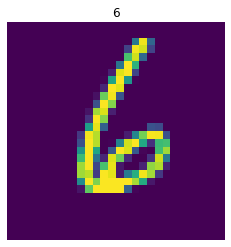

In [76]:
idx = np.random.randint(a_train.shape[0])
a_sample = a_train[idx]
b_sample = b_train0[idx]
plt.imshow(a_sample)
plt.title(b_sample)
plt.axis('off');

In [77]:
print("a_train:", a_train.shape)
print("a_test:", a_test.shape)
print("b_train:", b_train0.shape)
print("b_test:", b_test0.shape)

a_train: (60000, 28, 28)
a_test: (10000, 28, 28)
b_train: (60000,)
b_test: (10000,)


In [0]:
a_train = a_train.reshape(60000, 28, 28, 1)
a_test = a_test.reshape(10000, 28, 28, 1)

In [0]:
a_train = a_train / a_train.max()
a_test = a_test / a_test.max()

b_train = to_categorical(b_train0, 10)
b_test = to_categorical(b_test0, 10)

### 建(mnist)神經網路

In [0]:
CNN_layers = [Conv2D(28, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'),
        MaxPool2D(),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPool2D(),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        GlobalAveragePooling2D()]

In [0]:
FC_layers = [Dense(units=256, activation='relu'),
       Dense(units=10, activation='softmax')]

### 看看模型長相

In [82]:
model_10 = Sequential(CNN_layers+FC_layers)
model_10.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        16192     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
global_average_pooling2d_5 ( (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

In [0]:
for layer in FC_layers:
    layer.train = False

### 設定評量好壞的指標

In [0]:
model_10.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(), 
    metrics=['categorical_accuracy'])

### 訓練

In [85]:
model_10.fit(a_train, b_train, batch_size=128, epochs=5, validation_data=(a_test, b_test))

Epoch 1/5
469/469 [==============================] - 85s 182ms/step - loss: 0.7347 - categorical_accuracy: 0.7563 - val_loss: 0.2816 - val_categorical_accuracy: 0.9184
Epoch 2/5
469/469 [==============================] - 85s 182ms/step - loss: 0.2360 - categorical_accuracy: 0.9269 - val_loss: 0.2765 - val_categorical_accuracy: 0.9108
Epoch 3/5
469/469 [==============================] - 88s 187ms/step - loss: 0.1694 - categorical_accuracy: 0.9477 - val_loss: 0.1432 - val_categorical_accuracy: 0.9577
Epoch 4/5
469/469 [==============================] - 85s 181ms/step - loss: 0.1295 - categorical_accuracy: 0.9599 - val_loss: 0.1189 - val_categorical_accuracy: 0.9648
Epoch 5/5
469/469 [==============================] - 85s 181ms/step - loss: 0.1081 - categorical_accuracy: 0.9662 - val_loss: 0.0985 - val_categorical_accuracy: 0.9657


### 儲存模型

In [87]:
%ls /content/drive

'My Drive'/


In [88]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [90]:
%cd my_ai_data

/content/drive/My Drive/my_ai_data


In [91]:
%ls

 checkpoint                                'model.ckpt-1.index 的副本'
'checkpoint 的副本'                         myCNNmodel.h5
 model.ckpt-1.data-00000-of-00001          'myCNNmodel.h5 的副本'
'model.ckpt-1.data-00000-of-00001 的副本'   transfer_HW_cifar10_weight.h5
 model.ckpt-1.index


In [0]:
model.save_weights('transfer_HW_mnist_weight.h5')  # 存在nccu帳號裡

### 看看結果

In [95]:
score_train_2 = model_10.evaluate(a_train, b_train)
score_test_2 = model_10.evaluate(a_test, b_test)

print(f'Train Accuracy: {score_train_2[1]*100}')
print(f'Test Accuracy: {score_test_2[1]*100}')

313/313 [==============================] - 5s 16ms/step - loss: 0.0985 - categorical_accuracy: 0.9657
Train Accuracy: 96.64499759674072
Test Accuracy: 96.56999707221985
